In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
list=[0,1]



In [4]:
Z=128
pos=[1,4,7,9]
pZgB=0
num=0
den=0
N=10
bitlist=[0,1]
formula=((1-alpha)/(1+alpha))*(alpha**(abs(Z-bval)))

In [5]:
#order of a 10 bit byte (generates 10 bits nuber every iteration)
def byteOrder(bitlist,pos):
    bits=[]
    for i in range(0,10):
        bits.append(random.choice(list))
    return bits
#converts binary to decimal
def evalbin(bits):
    bval=0
    p=0
    for i in range(0,10):
        p=2**i
        bval+=p*bits[i]
    return bval

In [7]:
Z=128
alpha=0.1
pBgZ=0
N=1000000
#evaluates the conditional probability
def ForEachPos(Z,alpha,pBgZ,N,pos):
    num=0
    den=0
    for i in range(0,N):
        bits=byteOrder(bitlist,pos)
        #print(bits)
        bval=evalbin(bits)
        pZgB=((1-alpha)/(1+alpha))*(alpha**(abs(Z-bval)))
        #print(pZgB)
        den+=pZgB
        #print(den)
        if(bits[pos]==1):
            num+=pZgB
    pBgZ=num/den
    return float(pBgZ)


In [9]:
num=0
den=0
Z=128
pBgZ=0
alpha=0.1
pos=[1,4,7,9]
iterations=[1.0e6*round(i,2) for i in np.arange(1,1.7,0.1)]
plt_answers=np.zeros([4,7])
for ipos,ps in enumerate(pos):
    for j,itr in enumerate(iterations):
        pBgZ=0
        plt_answers[ipos,j]=ForEachPos(Z,alpha,pBgZ,np.int(itr),ps)

In [10]:
print(plt_answers)

[[0.10130724 0.1035742  0.09434209 0.09687299 0.09676475 0.10078879
  0.09728133]
 [0.09328763 0.09221675 0.08840225 0.0927822  0.08938912 0.09136275
  0.08895219]
 [0.9063599  0.90444988 0.9040241  0.90806362 0.90706391 0.90914615
  0.90905516]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


C:\Users\mishr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


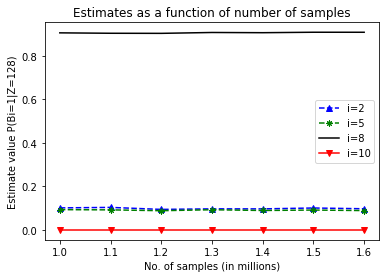

In [19]:
itrval=[x/1e6 for x in iterations]
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(itrval,plt_answers[0,:],c='b',marker="^",ls='--',label='i=2')
ax.plot(itrval,plt_answers[1,:],c='g',marker=(8,2,0),ls='--',label='i=5')
ax.plot(itrval,plt_answers[2,:],c='k',ls='-',label='i=8')
ax.plot(itrval,plt_answers[3,:],c='r',marker="v",ls='-',label='i=10')
plt.title('Estimates as a function of number of samples')
plt.xlabel('No. of samples (in millions)')
plt.ylabel('Estimate value P(Bi=1|Z=128)')
plt.legend(loc=5)
plt.draw()
plt.savefig('a2plot.png')